<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4250 non-null   int64  
 1   number          4250 non-null   int64  
 2   title           4250 non-null   object 
 3   classification  4250 non-null   object 
 4   timestamp       4250 non-null   object 
 5   latitude        4250 non-null   float64
 6   longitude       4250 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 232.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               5021 non-null   int64  
 1   observed            4983 non-null   object 
 2   location_details    4260 non-null   object 
 3   county              5021 non-null   object 
 4   state              

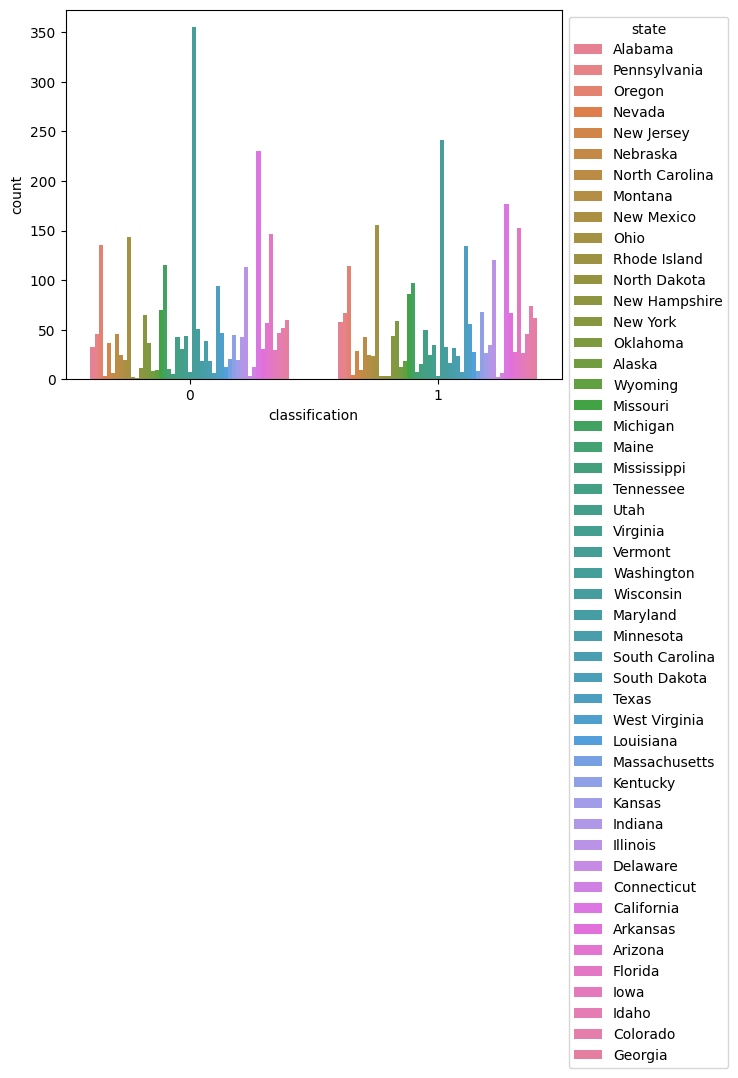

In [1]:
%run EDA.ipynb

In [2]:
# Create a list of stopwords in English
stopwords_list = stopwords.words('english')

tokenizer = RegexpTokenizer(r"(?u)\w{3,}") #selecting words with 3 more or more characters
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()
# stemmer = LancasterStemmer()

In [3]:
def preprocess_text(text, tokenizer, stopwords_list, lemma):
    
    #take care of the misspelled words 
    auto_correct = TextBlob(text)
    auto_correct = auto_correct.correct()
    auto_correct = str(auto_correct)
    
    # Standardize case (lowercase the text)
    word = auto_correct.lower()
    
    # Tokenize text using `tokenizer`
    token = [w for w in tokenizer.tokenize(word) if w.isalpha()]
    
    # Remove stopwords using `stopwords_list`
    stopped_tokens = [word for word in token if word not in stopwords_list]
    
    # Stem the tokenized text using `stemmer`
    lemmas = [lemma.lemmatize(token) for token in stopped_tokens]
    
    # Return the preprocessed text
    return lemmas

In [4]:
#applying the preprocess_text function to each row of the 'OBSERVED' column
#this takes about 2 hours to run
text_data = merged_df.OBSERVED.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemma))

In [5]:
text_data

0        [canning, tipsy, river, alabama, dusk, pulling...
1        [salmon, fishing, companion, prince, william, ...
2        [attending, would, stay, girlfriend, mother, h...
3        [hello, name, though, reluctant, post, story, ...
4        [may, two, friend, hill, yamhill, late, evenin...
                               ...                        
24056    [camping, protecting, equipment, feat, startin...
24057    [way, work, saturday, morning, misty, foggy, m...
24058    [twenty, sixth, twenty, seventh, approximately...
24059    [hunting, neighbor, property, right, daylight,...
24060    [riding, friend, summer, back, road, night, st...
Name: OBSERVED, Length: 4953, dtype: object

In [7]:
#creating a new column for the preprocessed text 
merged_df['preprocessed_text'] =  text_data
merged_df

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,preprocessed_text
0,2010,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,30680.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[canning, tipsy, river, alabama, dusk, pulling..."
1,1990,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,1261.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[salmon, fishing, companion, prince, william, ..."
2,1974,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,"Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,6496.0,1,drm5ucxrc0,78.17,73.425,68.68,65.72,0.86,0.86,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92,"[attending, would, stay, girlfriend, mother, h..."
3,1972,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,8000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[hello, name, though, reluctant, post, story, ..."
4,1984,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,703.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[may, two, friend, hill, yamhill, late, evenin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24056,2005,dulce nm,(withheld),while camping protecting other equipment befor...,no frist time camping there,"one nephew, my two son where sleeping",local people talk off seeing bigfoot in the ar...,"moon was half full, about 0330 hrs. clear skys...","mountain valley, with ridges and canyons, pine...",11992.0,(withheld),Rio Arriba County,New Mexico,Summer,NaN,NaN,NaN,11992.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[camping, protecting, equipment, feat, startin..."
24057,1976,NaN,NaN,I was on my way to work on a Saturday morning ...,NaN,I was on my way to work around 7 am on a Satur...,NaN,NaN,there is an undeveloped area of land that stra...,1171.0,"Laurel, Maryland. It was sighted off of Rt 19...",Prince George's County,Maryland,Spring,NaN,NaN,NaN,1171.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[way, work, saturday, morning, misty, foggy, m..."
24058,2011,Sorrento,Mt.

In [8]:
merged_df['TIME_AND_CONDITIONS'][0]

'Dusk, was a clear day in about the high 80s temperature'

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4953 entries, 0 to 24060
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 4953 non-null   int64  
 1   NEAREST_TOWN         4642 non-null   object 
 2   NEAREST_ROAD         4269 non-null   object 
 3   OBSERVED             4953 non-null   object 
 4   ALSO_NOTICED         3236 non-null   object 
 5   OTHER_WITNESSES      4417 non-null   object 
 6   OTHER_STORIES        3504 non-null   object 
 7   TIME_AND_CONDITIONS  4499 non-null   object 
 8   ENVIRONMENT          4690 non-null   object 
 9   REPORT_NUMBER        4953 non-null   float64
 10  location_details     4203 non-null   object 
 11  county               4953 non-null   object 
 12  state                4953 non-null   object 
 13  season               4953 non-null   object 
 14  title                3996 non-null   object 
 15  latitude             3996 non-null   float

In [10]:
merged_df

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,preprocessed_text
0,2010,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,30680.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[canning, tipsy, river, alabama, dusk, pulling..."
1,1990,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,1261.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[salmon, fishing, companion, prince, william, ..."
2,1974,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,"Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,6496.0,1,drm5ucxrc0,78.17,73.425,68.68,65.72,0.86,0.86,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92,"[attending, would, stay, girlfriend, mother, h..."
3,1972,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,8000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[hello, name, though, reluctant, post, story, ..."
4,1984,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,703.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[may, two, friend, hill, yamhill, late, evenin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24056,2005,dulce nm,(withheld),while camping protecting other equipment befor...,no frist time camping there,"one nephew, my two son where sleeping",local people talk off seeing bigfoot in the ar...,"moon was half full, about 0330 hrs. clear skys...","mountain valley, with ridges and canyons, pine...",11992.0,(withheld),Rio Arriba County,New Mexico,Summer,NaN,NaN,NaN,11992.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[camping, protecting, equipment, feat, startin..."
24057,1976,NaN,NaN,I was on my way to work on a Saturday morning ...,NaN,I was on my way to work around 7 am on a Satur...,NaN,NaN,there is an undeveloped area of land that stra...,1171.0,"Laurel, Maryland. It was sighted off of Rt 19...",Prince George's County,Maryland,Spring,NaN,NaN,NaN,1171.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[way, work, saturday, morning, misty, foggy, m..."
24058,2011,Sorrento,Mt.

In [11]:
merged_df['preprocessed_text'].value_counts()

preprocessed_text
[sitting, mother, kitchen, niece, mother, happened, look, back, door, clearly, saw, tall, approximately, foot, creature, moving, two, leg, extremely, rapid, pace, weed, bordering, yard, yelled, god, one, niece, standing, near, door, whirled, around, also, saw, creature, second, stunned, silence, went, back, yard, saw, creature, yard, dash, behind, storage, building, remember, afraid, everyone, else, pursue, whatever, said, creature, walking, leg, approximately, foot, tall, covered, dark, brown, black, hair, creature, walking, cunningly, rapid, pace, shoulder, hunched, forward, thing, moving, away, see, facial, feature, head, appeared, rounded, see, thing, assumed, stepped, fence, behind, storage, building, preceded, field, wood, struck, rapidly, thing, moving, amazed, ...]    2
[canning, tipsy, river, alabama, dusk, pulling, river, trying, hurry, get, gear, car, got, dark, yard, walk, steep, hill, car, must, slipping, canoe, put, shoulder, heard, loud, whoooop, whooop

In [12]:
merged_df['OBSERVED'].value_counts()

OBSERVED
I was sitting in my mother's kitchen with 2 of my nieces and my mother when I happened to look out of her back door. I clearly saw a very tall (approximately 7 feet) creature moving on two legs at an extremely rapid pace through the weeds bordering on her yard. I yelled "My God, what is that?" One of my nieces standing near the door whirled around and also saw the creature. After a few seconds of stunned silence we went into the back yard and saw the creature, now in the yard itself, dash behind a storage building. I remember being very afraid, as was everyone else, so we did not pursue whatever this was. As I said this creature was walking on 2 legs, was approximately 7 feet tall, covered with very dark brown or black hair. The creature was walking at a stunningly rapid pace with it's shoulders hunched forward. As this thing was moving away from us we did not see any facial features but the head appeared rounded. We did not see this thing any more and assumed that it had step

In [13]:
merged_df[merged_df['OBSERVED'] == 'The following incidents occurred between the years 1984 and 1986 around our woods which is located just south of the intersection of E300 N Rd 300 and county road 1425 Northwest of Atwood Illinois. At the time we lived in the 15 acre woods which is at that location. The Lake fork river runs just behind that woods and there is a bottom land just north of the woods which floods every fall. At the time I was a teenager and hunted, fished and trapped along a several mile stretch of that river. The encounters we had were not visual. The first instance was about 10pm on a winter evening when I was going to let our poodle out before turning in for the night. There was only what I could describe as a combination of a Scream/howl which came from just on the North side of the house. Our dog was so frightened it would not go out of the door. He was not afraid of anything and to see that fear in him was shocking. The volume of the howl was immense. My mother was home and heard it as well. Even from inside a well insulated Illinois home it sounded as if it was right next to you. I had the door open and it felt like I had been hit in the chest by the sound. The second instance was just south of that woods about a half mile down from where the river bends. I was returning from hunting about 5pm in the evening and heard the exact same howl. It came from the smaller wood which is right next to the river just south of our woods. The 3rd instance was a series of footprints along the bank of the lake fork river. Just to the west of the road intersection mentioned above, the lake fork passes under a bridge. Just south of that bridge the river bends and flows east. I was fishing along that bend on a spring day about 10 in the morning. I felt that there was something not right and then realized that there were no animal sounds. Typically there are all sorts of sparrows and red winged black birds, but there was nothing. I looked down as I was walking and noticed that I was walking next to a line of footprints in the mud. I wore mens size 12 hiking boots and these prints were 5 toed and 2" wider and 3" longer than my boots. They were very fresh with dirt still loose on the edge of the track. I looked up and down the river but did not see a thing. The river banks in that area are steep with tall grass. The forth instance was while deer hunting on the east side of the large woods just to the north east of that bridge. I had gone out bow hunting and had set up a blind on the east side of the woods. I had walked from our house and was set up in a blind in full camo by 45mins prior to sunrise. Just before light I heard the same howl which I estimated came from about 50 yards away to my north. It was so powerful that it shook me. I waited for several minutes and it howled again. Only having a bow and not a gun I literally walked backwards the few hundred yards back to the county road with an arrow knocked and ready to go. Not that it would have done any good. You could tell by the volume of the scream/howl that this was a very very large creature. The 5th instance was around 10:30 at night in the back of our house. We kept a large horse tank in the back where we would dump and burn trash. It was approximately 35 yards behind the house. I was taking the trash out and had just dumped it when I heard a "Hmph" from the edge of the tree line which was about 10 yards away. I head another "Hmph" and then something large taking off down the side of the hill towords the bottom land, I headed quickly in the house. The next morning I checked the area and could see the same size prints mentioned above. I couldn\'t see them clearly as before due to thick ground cover of leaves. The Howls around our house were heard by my mother. I do not know of any other people in the area having the same instances. at the time there were only 4 families living in that area. Us, my uncle who lived across the river, a family that lived in the house by the bridge and another that lived just east of the road intersection mentioned above.']

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,preprocessed_text
23653,1984,Atwood,E 300 N Rd & CR 1425,The following incidents occurred between the y...,These were a series of instances over a couple...,My mother for 1 occurrence,No. People in that area are private and typica...,As described in the report above.,"Farmland, River, Wooded",47469.0,Exact locations provided in the report.,Piatt County,Illinois,Unknown,Report 47469: Memory told of possible vocaliza...,39.8352,-88.47835,47469.0,0,dp14deu0c5,37.96,35.72,33.48,24.65,0.76,0.59,0.42,0.0003,1.0,rain,1024.92,Mixed precipitation overnight.,2.0,4.14,190.0,2.31,"[following, incident, occurred, year, around, ..."


In [14]:
merged_df['OBSERVED'][23653]

'The following incidents occurred between the years 1984 and 1986 around our woods which is located just south of the intersection of E300 N Rd 300 and county road 1425 Northwest of Atwood Illinois. At the time we lived in the 15 acre woods which is at that location. The Lake fork river runs just behind that woods and there is a bottom land just north of the woods which floods every fall. At the time I was a teenager and hunted, fished and trapped along a several mile stretch of that river. The encounters we had were not visual. The first instance was about 10pm on a winter evening when I was going to let our poodle out before turning in for the night. There was only what I could describe as a combination of a Scream/howl which came from just on the North side of the house. Our dog was so frightened it would not go out of the door. He was not afraid of anything and to see that fear in him was shocking. The volume of the howl was immense. My mother was home and heard it as well. Even fr

In [15]:
text = merged_df['preprocessed_text'][23653]

In [16]:
Counter(text).most_common(10)

[('wood', 9),
 ('river', 9),
 ('house', 7),
 ('instance', 6),
 ('howl', 5),
 ('heard', 5),
 ('east', 5),
 ('south', 4),
 ('road', 4),
 ('lived', 4)]

In [17]:
merged_df[merged_df['OBSERVED'].duplicated() ==  True]

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,preprocessed_text
21043,1985,Charlotte,Junction of State Hwy 49 and Greenwood Road,I was sitting in my mother's kitchen with 2 of...,No odor or noise was noted at the time and thi...,Everyone was just sitting or standing around t...,NaN,This incident occurred in either June or July ...,The terrain in the area is rolling hills with ...,6478.0,This incident occurred approximately 4 miles e...,Dickson County,Tennessee,Summer,NaN,NaN,NaN,6417.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[sitting, mother, kitchen, niece, mother, happ..."


In [18]:
merged_df[merged_df['preprocessed_text'].duplicated() == True]

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,preprocessed_text
21043,1985,Charlotte,Junction of State Hwy 49 and Greenwood Road,I was sitting in my mother's kitchen with 2 of...,No odor or noise was noted at the time and thi...,Everyone was just sitting or standing around t...,NaN,This incident occurred in either June or July ...,The terrain in the area is rolling hills with ...,6478.0,This incident occurred approximately 4 miles e...,Dickson County,Tennessee,Summer,NaN,NaN,NaN,6417.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[sitting, mother, kitchen, niece, mother, happ..."


In [19]:
merged_df['OBSERVED'][21043]

'I was sitting in my mother\'s kitchen with 2 of my nieces and my mother when I happened to look out of her back door. I clearly saw a very tall (approximately 7 feet) creature moving on two legs at an extremely rapid pace through the weeds bordering on her yard. I yelled "My God, what is that?" One of my nieces standing near the door whirled around and also saw the creature. After a few seconds of stunned silence we went into the back yard and saw the creature, now in the yard itself, dash behind a storage building. I remember being very afraid, as was everyone else, so we did not pursue whatever this was. As I said this creature was walking on 2 legs, was approximately 7 feet tall, covered with very dark brown or black hair. The creature was walking at a stunningly rapid pace with it\'s shoulders hunched forward. As this thing was moving away from us we did not see any facial features but the head appeared rounded. We did not see this thing any more and assumed that it had stepped ov

In [20]:
merged_df['preprocessed_text'][21043]

['sitting',
 'mother',
 'kitchen',
 'niece',
 'mother',
 'happened',
 'look',
 'back',
 'door',
 'clearly',
 'saw',
 'tall',
 'approximately',
 'foot',
 'creature',
 'moving',
 'two',
 'leg',
 'extremely',
 'rapid',
 'pace',
 'weed',
 'bordering',
 'yard',
 'yelled',
 'god',
 'one',
 'niece',
 'standing',
 'near',
 'door',
 'whirled',
 'around',
 'also',
 'saw',
 'creature',
 'second',
 'stunned',
 'silence',
 'went',
 'back',
 'yard',
 'saw',
 'creature',
 'yard',
 'dash',
 'behind',
 'storage',
 'building',
 'remember',
 'afraid',
 'everyone',
 'else',
 'pursue',
 'whatever',
 'said',
 'creature',
 'walking',
 'leg',
 'approximately',
 'foot',
 'tall',
 'covered',
 'dark',
 'brown',
 'black',
 'hair',
 'creature',
 'walking',
 'cunningly',
 'rapid',
 'pace',
 'shoulder',
 'hunched',
 'forward',
 'thing',
 'moving',
 'away',
 'see',
 'facial',
 'feature',
 'head',
 'appeared',
 'rounded',
 'see',
 'thing',
 'assumed',
 'stepped',
 'fence',
 'behind',
 'storage',
 'building',
 'precede

In [21]:
#dropping duplicates
merged_df.drop_duplicates(subset='OBSERVED', inplace=True)

In [22]:
#checking to see if the duplicates in the OBSERVED column has been dropped 
merged_df['OBSERVED'].duplicated().sum()

0

In [23]:
#creating a bag of words term-document matrix
corpus = merged_df['preprocessed_text']
vectorize = TfidfVectorizer()
corpus

0        [canning, tipsy, river, alabama, dusk, pulling...
1        [salmon, fishing, companion, prince, william, ...
2        [attending, would, stay, girlfriend, mother, h...
3        [hello, name, though, reluctant, post, story, ...
4        [may, two, friend, hill, yamhill, late, evenin...
                               ...                        
24056    [camping, protecting, equipment, feat, startin...
24057    [way, work, saturday, morning, misty, foggy, m...
24058    [twenty, sixth, twenty, seventh, approximately...
24059    [hunting, neighbor, property, right, daylight,...
24060    [riding, friend, summer, back, road, night, st...
Name: preprocessed_text, Length: 4952, dtype: object

In [24]:
corpus[0]

['canning',
 'tipsy',
 'river',
 'alabama',
 'dusk',
 'pulling',
 'river',
 'trying',
 'hurry',
 'get',
 'gear',
 'car',
 'got',
 'dark',
 'yard',
 'walk',
 'steep',
 'hill',
 'car',
 'must',
 'slipping',
 'canoe',
 'put',
 'shoulder',
 'heard',
 'loud',
 'whoooop',
 'whooop',
 'whooop',
 'whooop',
 'pause',
 'three',
 'troop',
 'wood',
 'enough',
 'know',
 'owl',
 'like',
 'sound',
 'ever',
 'heard',
 'wood',
 'river',
 'loud',
 'powerful',
 'felt',
 'like',
 'came',
 'quarter',
 'half',
 'mile',
 'away',
 'scared',
 'pas',
 'never',
 'seen',
 'guy',
 'rustle',
 'le',
 'canoe',
 'shoulder',
 'practically',
 'run',
 'hill',
 'even',
 'tie',
 'properly',
 'got',
 'highway',
 'weird',
 'part',
 'watching',
 'monster',
 'guest',
 'series',
 'month',
 'come',
 'river',
 'thought',
 'area',
 'look',
 'like',
 'cap',
 'show',
 'pacific',
 'northwest',
 'bogfoots',
 'wonder',
 'ever',
 'bigfoot',
 'alabama',
 'internet',
 'search',
 'surprised',
 'cap',
 'found',
 'whole',
 'breaking',
 'webs

In [25]:
# #creating a csv with the new preprocessed_text column 
# merged_df.to_csv('processed_text.csv')